In [15]:
%pip install matplotlib

  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl (160 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
                                              0.0/1.0 MB ? eta -:--:--
     -                                        0.0/1.0 MB 660.6 kB/s eta 0:00:02
     -                                        0.0/1.0 MB 667.8 kB/s eta 0:00:02
     ----                                     0.1/1.0 MB 901.1 kB/s eta 0:00:01
     --------                                 0.2/1.0 MB 1.1 MB/s eta 0:00:01
     -------------                            0.3/1.0 MB 1.4 MB/s eta 0:00:01
     -----------------                        0.4/1.0 MB 1.5 MB/s eta 0:00:01
     ---------------------                    0.5/1.0 MB 1.7 MB/s eta 0:00:01
     ------------------------                 0.6/1.0 MB 1.6 MB/s eta 0:00:01
     ----------------------------             0.7/1.0 MB 1.7 MB/s eta 0:00:01
     ------------------------------- 

In [19]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torchvision.transforms as transforms

In [25]:
data_COVID=r'C:\Users\PC\ML_Classification_Project\COVID-19-CT-Classification\Data\CT_COVID'
data_NonCOVID=r'C:\Users\PC\ML_Classification_Project\COVID-19-CT-Classification\Data\CT_NonCOVID'

In [26]:
COVID_train_paths = []
COVID_labels = []

for filename in os.listdir(data_COVID):
    image_path = os.path.join(data_COVID, filename)
    COVID_train_paths.append(image_path)
    COVID_labels.append(1)

COVID_train_paths = np.array(COVID_train_paths)
COVID_labels = np.array(COVID_labels)

NonCOVID_train_paths = []
NonCOVID_labels = []

for filename in os.listdir(data_NonCOVID):
    image_path = os.path.join(data_NonCOVID, filename)
    NonCOVID_train_paths.append(image_path)
    NonCOVID_labels.append(0)

NonCOVID_train_paths = np.array(NonCOVID_train_paths)
NonCOVID_labels = np.array(NonCOVID_labels)

all_image_paths = np.concatenate((COVID_train_paths, NonCOVID_train_paths), axis=0)
all_labels = np.concatenate((COVID_labels, NonCOVID_labels), axis=0)

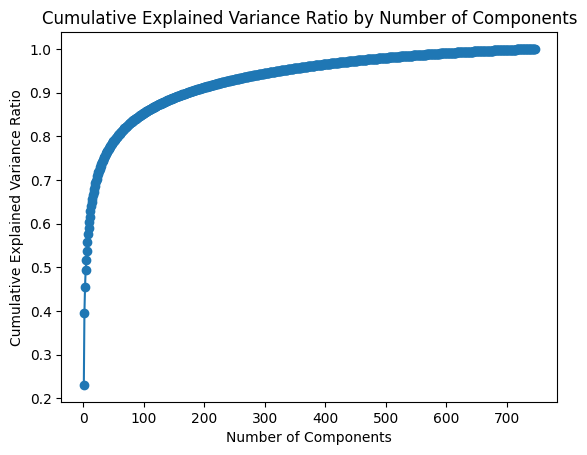

In [31]:
# Resize the images to a consistent size and convert to RGB format
resized_images = []
max_image_size = (224, 224)  # Replace with your desired image size

for path in all_image_paths:
    image = Image.open(path).convert("RGB")
    resized_image = image.resize(max_image_size)
    resized_images.append(resized_image)

# Convert the resized images to a numpy array
num_images = len(resized_images)
X = np.empty((num_images,) + max_image_size + (3,), dtype=np.uint8)

for i, image in enumerate(resized_images):
    X[i] = np.array(image)

# Flatten the images
X_flat = X.reshape(num_images, -1)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_flat)

# Calculate the cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.arange(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.show()


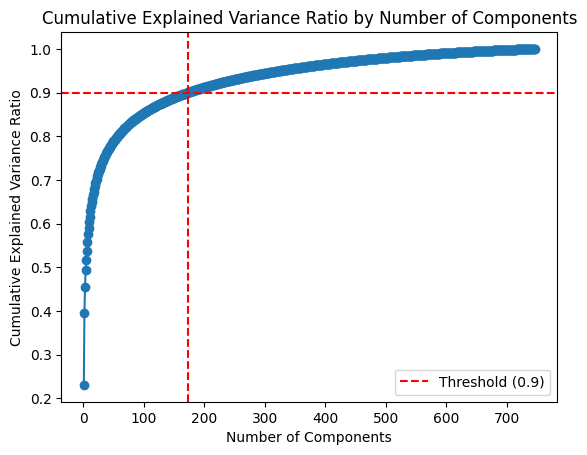

In [32]:
# Determine the desired threshold (e.g., 90%)
threshold = 0.9

# Find the index where the threshold is met or exceeded
threshold_index = np.argmax(explained_variance_ratio_cumulative >= threshold)

# Plot the cumulative explained variance ratio
plt.figure()
plt.plot(np.arange(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')

# Add a horizontal line at the threshold value
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
plt.axvline(x=threshold_index + 1, color='r', linestyle='--')

plt.legend()
plt.show()


In [33]:
# Determine the desired threshold (e.g., 90%)
threshold = 0.9

# Find the index where the threshold is met or exceeded
threshold_index = np.argmax(explained_variance_ratio_cumulative >= threshold)

# Get the exact number of components
num_components = threshold_index + 1

print("Number of components for 0.9 threshold:", num_components)


Number of components for 0.9 threshold: 173
